In [18]:
# import modules
import numpy as np
import astropy.units as u
from astropy.constants import G

# import plotting modules
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

#import previously developed functions
#Allows us to get the mass of each seperate component for a galaxy
from ComponentMassFuncs import ComponentMass
#Reading the .txt files
from ReadFile import Read
#Allows us to get the COM position and velocity
from CenterOfMass import CenterOfMass
#Rotate frame
from RotateFrame import RotateFrame
from RelativeMagnitude import RelativeMagnitude

## Goal: Isolate stellar streams and create ways to visualize them better, mainly in terms of velocity dispersion within a given stream

![Diagram](./DiagramRA.png)

# Setting up the problem

1) Write a function that that outputs the Jacobi Radius (Based on Lab #4)

    $R_j = r  \bigg( \frac{M_{sat}}{2 M_{host}(<r)} \bigg)^{1/3}$

In [23]:
from RA5funcs import JacobiRadius

#M_sat and M_host will be attained on step 2
#r will come from step 3

2) Get the masses for the satellite and the host from previous assignments (HW3)

In [25]:
#For that we will use the ComponentMass function

In [26]:
#Setting up the masses
M_host = ComponentMass('../../../M31/M31_000.txt', 1) + ComponentMass('../../../M31/M31_000.txt', 2) + ComponentMass('../../../M31/M31_000.txt', 3)+ ComponentMass('../../../MW/MW_000.txt', 1) + ComponentMass('../../../MW/MW_000.txt', 2)+ ComponentMass('../../../MW/MW_000.txt', 3)
#M_host has to be changing with time since MW and M31 are merging
M_sat = ComponentMass('../../../M33/M33_000.txt', 1) + ComponentMass('../../../M33/M33_000.txt', 2)
#M_sat is also changing with time since M33 is losing mass every time particles get beyond the Jacobi Radius

3) Retrieve separation from from the orbit files devised on (HW6)

In [28]:
#Getting the orbital info of M31 and M33
M31_Orbit = np.genfromtxt("Orbit_M31.txt")
M33_Orbit = np.genfromtxt("Orbit_M33.txt")
M31_M33_Sep = RelativeMagnitude(M33_Orbit[:, 1:4], M31_Orbit[:, 1:4])
M31_M33_Vel = RelativeMagnitude(M33_Orbit[:, 4:], M31_Orbit[:, 4:])

4) Retrieving code to determine relative position of particles in order to draw scatter plots weighted by velocity (Lab 7)

In [30]:
from RotateFrame import RotateFrame

5) Use the JacobiRadius function to create a mask, mkaing it so only particles beyond it are plotted

In [32]:
#Step done in "Functions Developed"

6) Find the best possible ways to visualize the stellar streams and understand their kinematics better

In [34]:
#Step done in "Attempts at visualizing the problem" and "Velocity Dispersion plots"
#Still need to think about other ways to visualize data

## Attempts at visualizing the problem

In [36]:
#print(M31_M33_Sep[52])
#print(M31_Orbit[52,0])

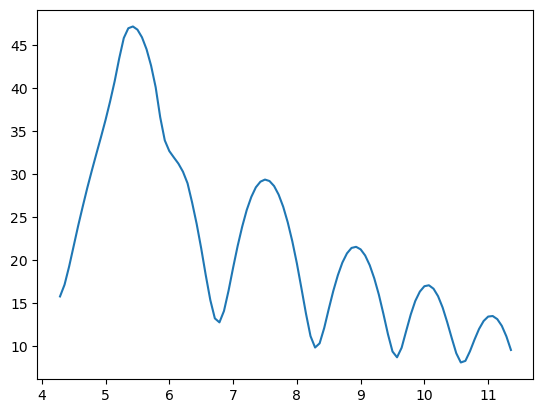

In [37]:
#Plot previewing how the Jacobi Radius for M33 changes over time
time = M31_Orbit[60:,0]
plt.plot(time,JacobiRadius(M_sat,M_host,M31_M33_Sep[60:]))
plt.show()

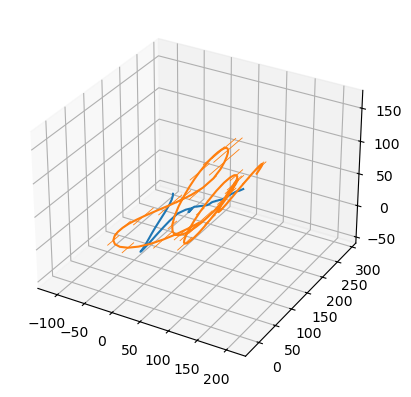

In [38]:
#Sample plot demonstrating the 3-D position of M33 with the Jacobi Radius as errorbars (A small part at least)
time = M31_Orbit[:,0]
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

#ax.plot(M31_Orbit[:,1], M31_Orbit[:,2], M31_Orbit[:,3])
ax.plot(M31_Orbit[52:160,1], M31_Orbit[52:160,2], M31_Orbit[52:160,3])
ax.errorbar(M33_Orbit[52:160,1], M33_Orbit[52:160,2], M33_Orbit[52:160,3], 
            yerr=JacobiRadius(M_sat,M_host,M31_M33_Sep[52:160]), elinewidth=0.6, errorevery=3)

plt.show()

## Functions Developed

In [40]:
#Probably will have all of these in each of their separate .py files, but at this points this seems like an easier way to understand the flow

from RA5funcs import VelocityDisp #Calculates and graphs the velocity dispersion, code from Lab 7

from RA5funcs import VelocityDispMask #Calculates and graphs the velocity dispersion, but apllies a mask so that 
                                        # only particles beyond the Jacobi Radius are considered, code from Lab 7 adapted

from RA5funcs import PlotVelDisp #Plots the color coded scatter plot from Lab 7 based on the VelocityDispMask function

from RA5funcs import PositionvsDispersion #

from RA5funcs import AvgDisp

# Plots

## Velocity Dispersion Mean over Time

/opt/anaconda3/lib/python3.12/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/anaconda3/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


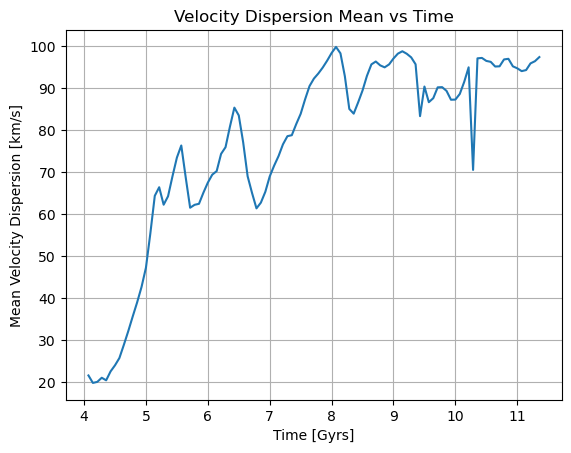

In [43]:
time = M33_Orbit[20:160,0]
plt.plot(time, AvgDisp(100, 800, 5))
plt.xlabel("Time [Gyrs]")
plt.ylabel("Mean Velocity Dispersion [km/s]")
plt.title("Velocity Dispersion Mean vs Time")
plt.grid(True)
plt.savefig("Plots/dispersion_vs_time.png")
plt.show()

## Velocity Dispersion plots

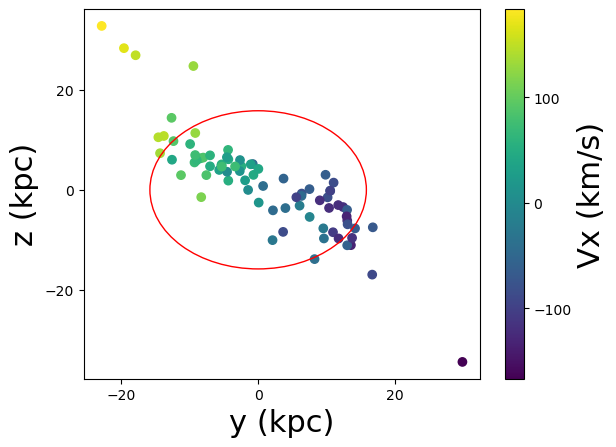

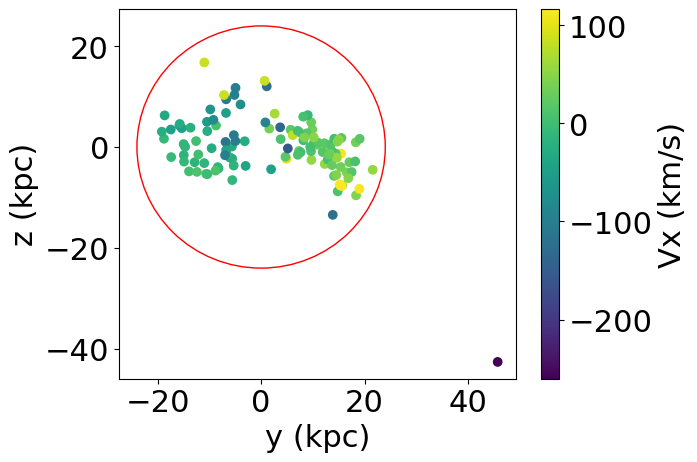

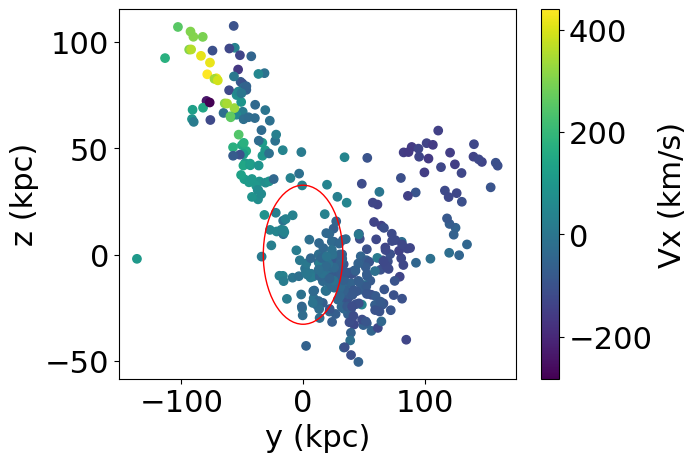

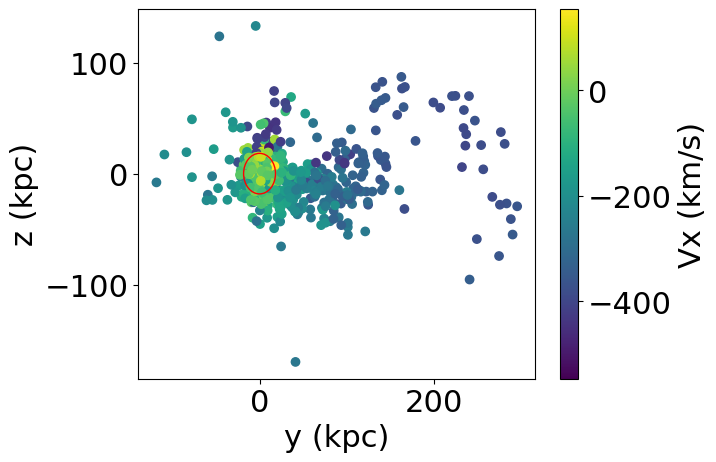

In [45]:
PlotVelDisp(300)
PlotVelDisp(320)
PlotVelDisp(420)
PlotVelDisp(460)

## Velocity Dispersion Profile Graphs

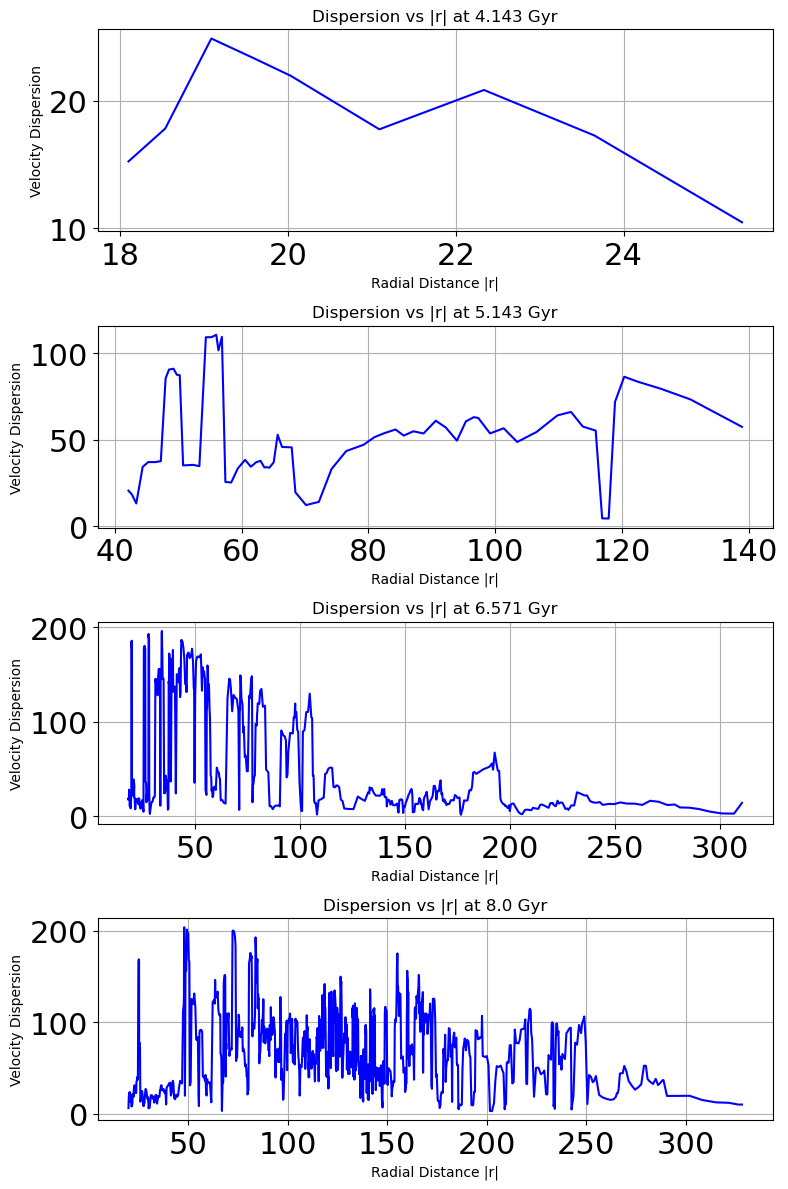

In [75]:
fig, axs = plt.subplots(4, 1, figsize=(8, 12), sharey=False)

axs[0].plot(PositionvsDispersion(290,5)[0], PositionvsDispersion(290,5)[1], label="|r|", color='blue')
axs[0].set_xlabel("Radial Distance |r|")
axs[0].set_ylabel("Velocity Dispersion")
axs[0].set_title(f"Dispersion vs |r| at {M33_Orbit[58,0]} Gyr")
axs[0].grid(True)

axs[1].plot(PositionvsDispersion(360,5)[0], PositionvsDispersion(360,5)[1], label="|r|", color='blue')
axs[1].set_xlabel("Radial Distance |r|")
axs[1].set_ylabel("Velocity Dispersion")
axs[1].set_title(f"Dispersion vs |r| at {M33_Orbit[72,0]} Gyr")
axs[1].grid(True)

axs[2].plot(PositionvsDispersion(460,5)[0], PositionvsDispersion(460,5)[1], label="|r|", color='blue')
axs[2].set_xlabel("Radial Distance |r|")
axs[2].set_ylabel("Velocity Dispersion")
axs[2].set_title(f"Dispersion vs |r| at {M33_Orbit[92,0]} Gyr")
axs[2].grid(True)

axs[3].plot(PositionvsDispersion(560,5)[0], PositionvsDispersion(560,5)[1], label="|r|", color='blue')
axs[3].set_xlabel("Radial Distance |r|")
axs[3].set_ylabel("Velocity Dispersion")
axs[3].set_title(f"Dispersion vs |r| at {M33_Orbit[112,0]} Gyr")
axs[3].grid(True)
plt.tight_layout()
plt.savefig("Plots/dispersion_vs_radius.png", dpi=300, bbox_inches='tight')

plt.show()

In [48]:
#Things to work on: How to deal with MW-M31 mass and how it affects the Jacobi Radius for M33,
    #M_sat and M_host changing with time, M_host has to only include the mass in between M_sat and M_host!!

#Plots:
    #Velocity Dispersion vs. Time
    #Velocity Dispersion vs. Distance from M33 COM
    #Animation?

#Cientific Relevance:
    #How does mass from M33-like statelite galaxies get accreted
    #How "well-defined" are these Stellar Streams? Low Velocity Dispersion or high compared to globular clusters(example)